### Importing useful packages and loading BindingDB dataset:

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import re
from bs4 import BeautifulSoup

In [17]:
import warnings

warnings.filterwarnings("ignore")

In [18]:
BINDING_DATASET = "BindingDB_All.tsv"

In [19]:
# Only loading columns of interest for this part :
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    #'Ki (nM)',
    #'IC50 (nM)',
    #'Kd (nM)',
    #'EC50 (nM)',
    #'kon (M-1-s-1)',
    #'koff (s-1)',
    # 'pH',
    # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # 'BindingDB Entry DOI',
    # 'PMID',
    # 'PubChem AID',
    "Patent Number",
    # "Authors",
    # "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    #'ChEBI ID of Ligand',
    #'ChEMBL ID of Ligand',
    #'DrugBank ID of Ligand',
    #'IUPHAR_GRAC ID of Ligand',
    #'KEGG ID of Ligand',
    #'ZINC ID of Ligand',
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    #'UniProt (SwissProt) Primary ID of Target Chain',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    #'UniProt (TrEMBL) Primary ID of Target Chain',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [20]:
bindingDB = pd.read_csv(BINDING_DATASET, sep="\t", on_bad_lines="skip", usecols=usecols)

### Investigating citations from Article DOI:

In [21]:
doi = bindingDB["Article DOI"].value_counts()
unique_doi_ordered = doi.index.tolist()

In [22]:
def get_citations(doi):
    """
    Get number of citations based on a DOI

    :doi: str, DOI of article

    return: number of citations (int)
    """
    url = f"https://api.crossref.org/works/{doi}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        citations = data.get("message", {}).get("is-referenced-by-count", {})
        return citations
    else:
        print(f"Error: {response.status_code}")
        return None

In [46]:
citations = []
for doi in unique_doi_ordered[0:1000]:  # Taking 1000 most frequent
    citation = get_citations(doi)
    citations.append({"doi": doi, "citation": citation})

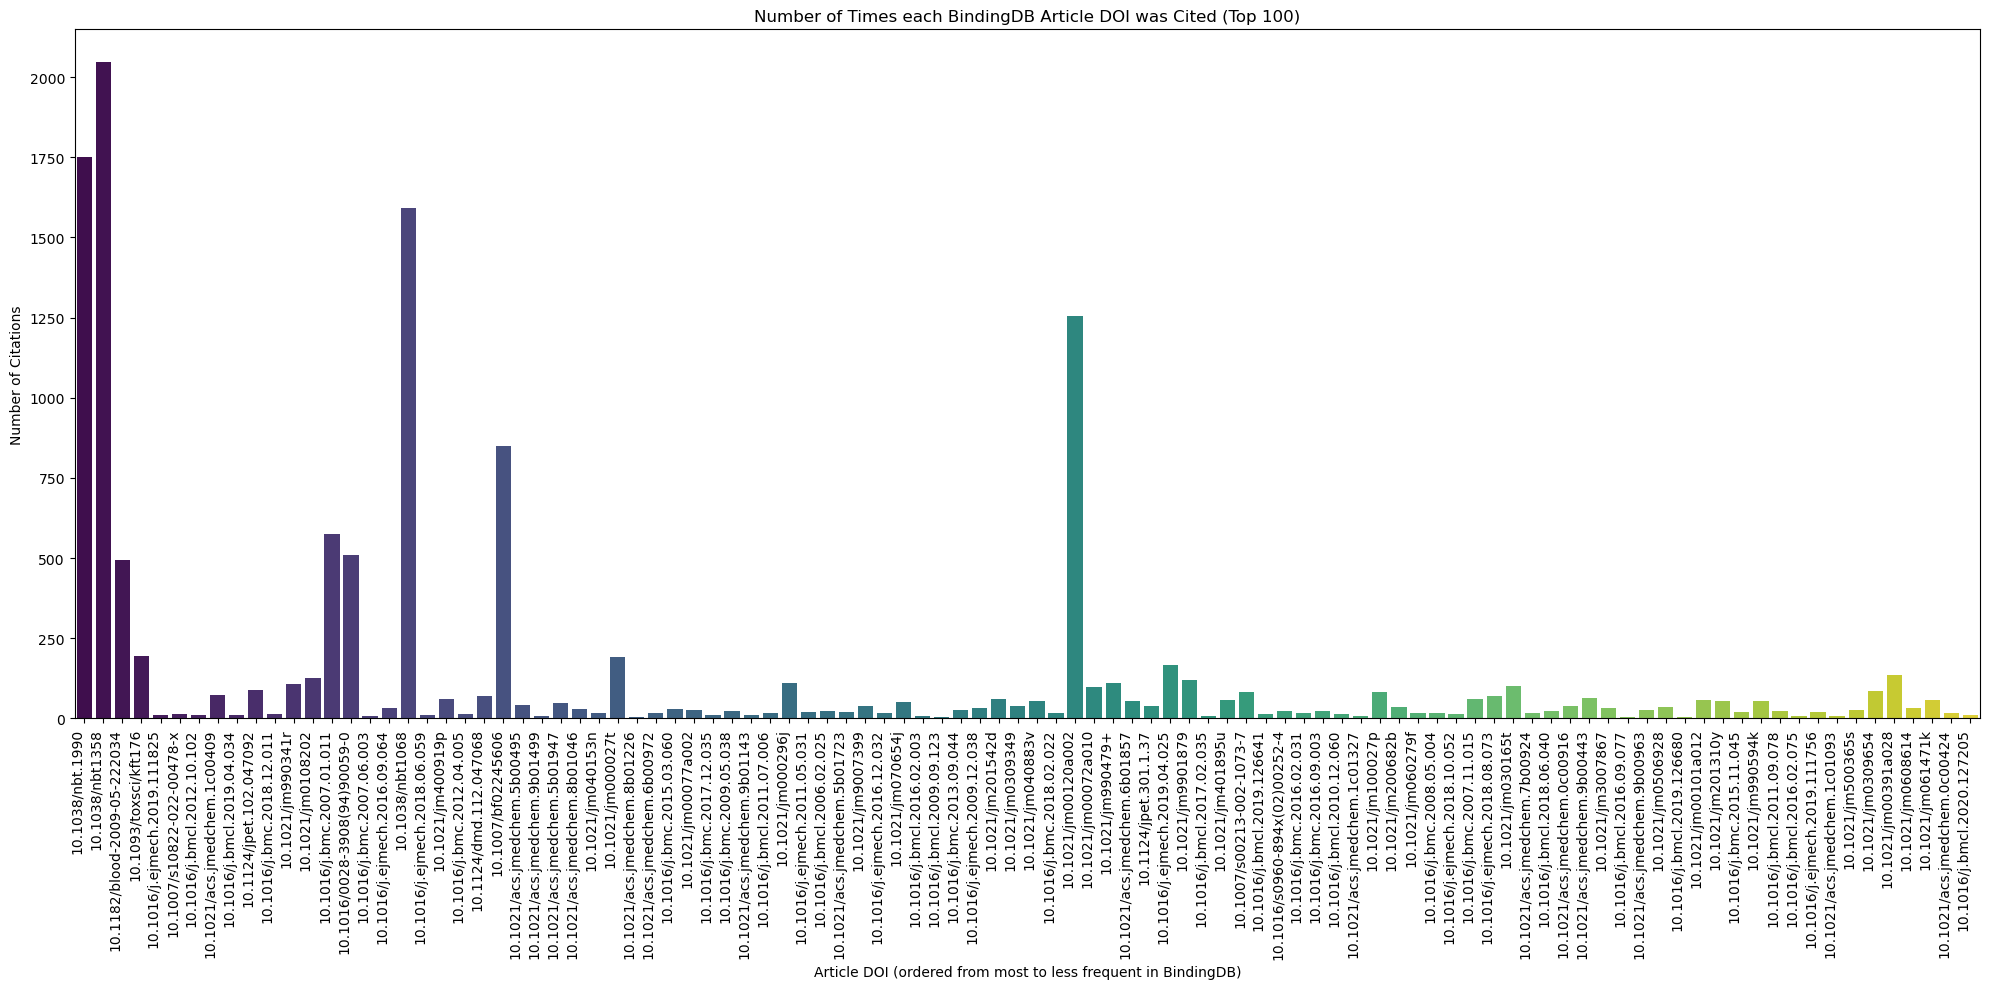

In [49]:
citations_df = pd.DataFrame(citations[0:100])
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less frequent in BindingDB)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

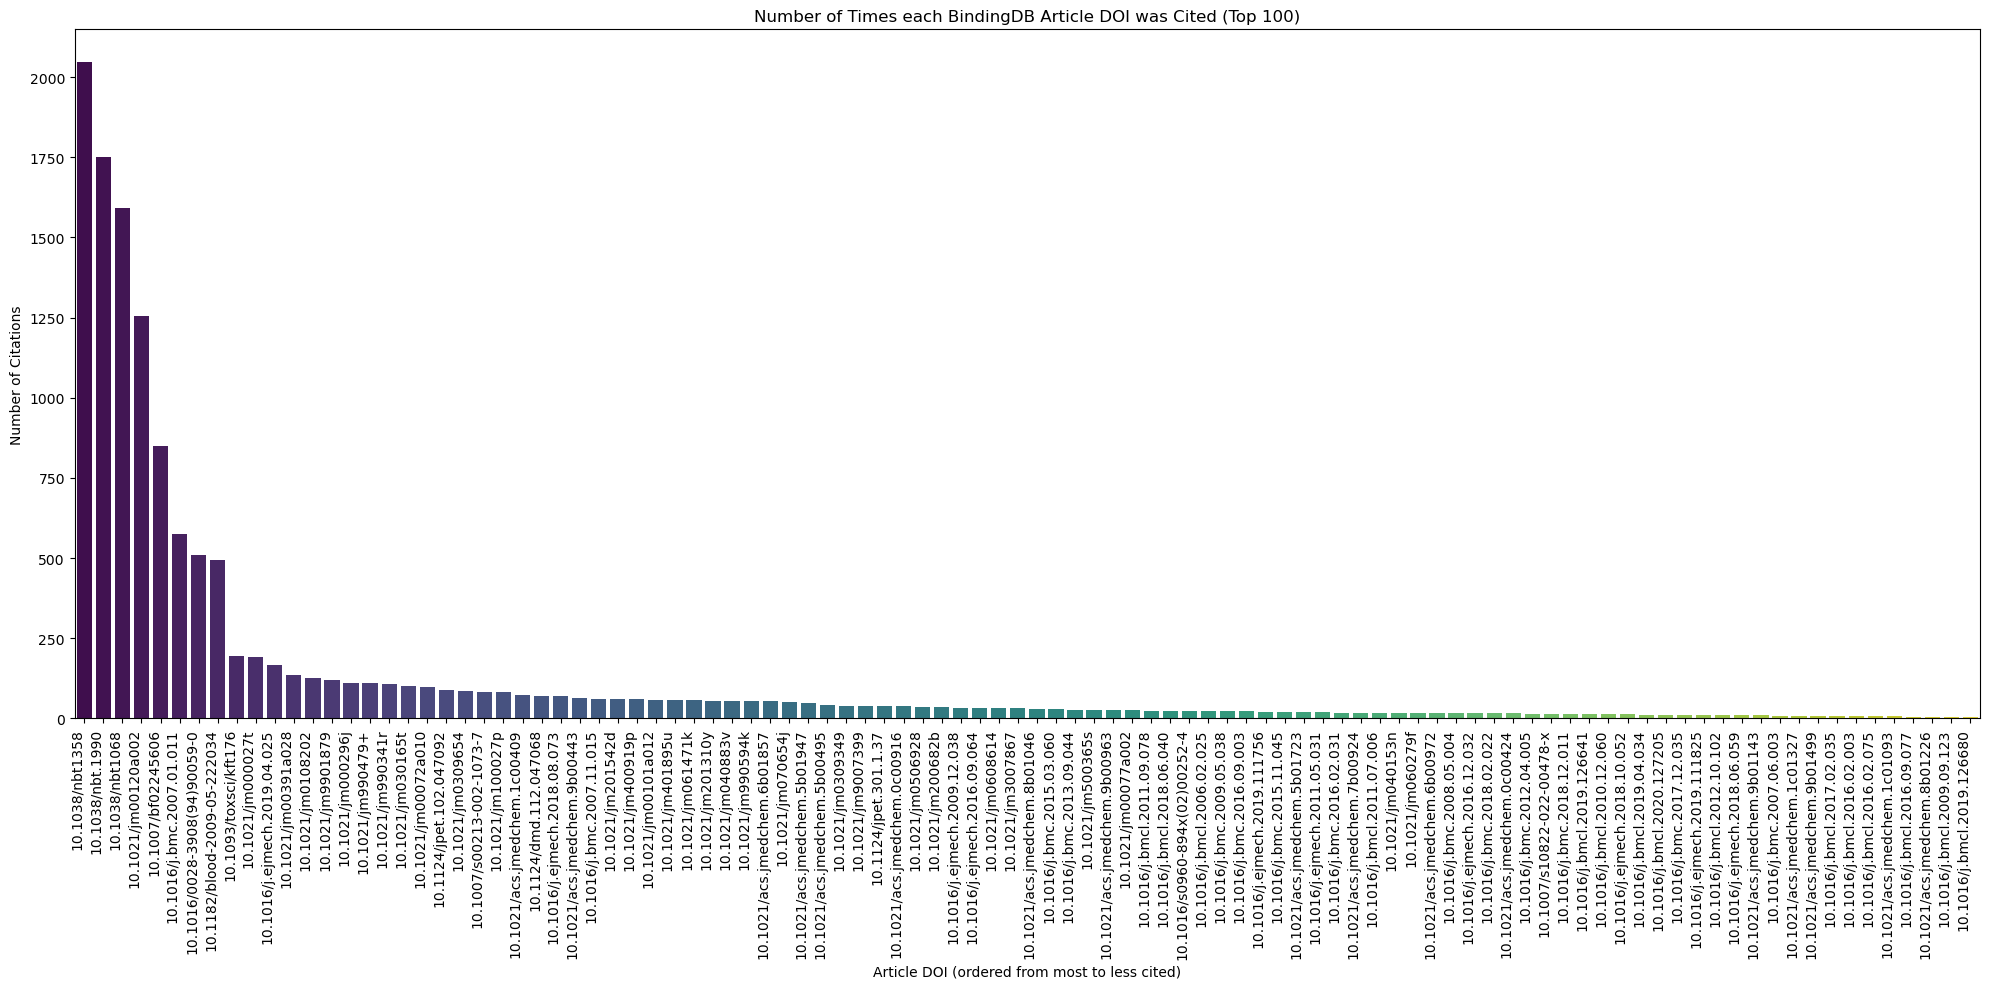

In [51]:
citations_df = pd.DataFrame(citations[0:100])
citations_df = citations_df.sort_values(by="citation", ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less cited)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

### Investigating Patents:

In [52]:
patents = bindingDB["Patent Number"].value_counts()
unique_patents_ordered = patents.index.tolist()

In [54]:
# Most studied ligands for each patent :
compounds_by_patent = bindingDB.groupby("Patent Number")[
    "BindingDB Ligand Name"
].unique()
# Most studied targets for each patent :
targets_by_patent = bindingDB.groupby("Patent Number")["Target Name"].unique()
# Nbr of unique targets for each patent -> broader = successful ? :
unique_target_counts = bindingDB.groupby("Patent Number")["Target Name"].nunique()
broad_patents = unique_target_counts.sort_values(ascending=False)

In [56]:
def get_patent_info(patent_number):
    url = f"https://patents.google.com/patent/{patent_number}/en"
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        title = soup.find("title").get_text()  # Find patent title
        abstract = soup.find("meta", {"name": "description"})[
            "content"
        ]  # Find patent abstract
        status = soup.find("span", {"itemprop": "ifiStatus"})  # Find patent status
        status = status.get_text() if status else "N/A"
        families_citing_header = soup.find(
            "h2", string=re.compile("Families Citing this family")
        )  # Find number of times it was cited by "family to family citations"
        if families_citing_header:
            families_citing_text = families_citing_header.get_text()
            families_citing_count = re.search(r"\((\d+)\)", families_citing_text)
            families_citing_count = (
                families_citing_count.group(1) if families_citing_count else "0"
            )
        else:
            families_citing_count = "0"
        cited_by_header = soup.find(
            "h2", string=re.compile("Cited By")
        )  # Find number of times it was cited by others
        if cited_by_header:
            cited_by_text = cited_by_header.get_text()
            cited_by_count = re.search(r"\((\d+)\)", cited_by_text)
            cited_by_count = cited_by_count.group(1) if cited_by_count else "0"
        else:
            cited_by_count = "0"
        return {
            "title": title,
            "abstract": abstract,
            "url": url,
            "status": status,
            "families citing": families_citing_count,
            "cited by": cited_by_count,
        }
    except requests.RequestException as e:
        print(f"Error fetching patent details: {e}")
        return None

In [57]:
patent_info = []
for patent in unique_patents_ordered[0:100]:
    patent_info.append(get_patent_info(patent))

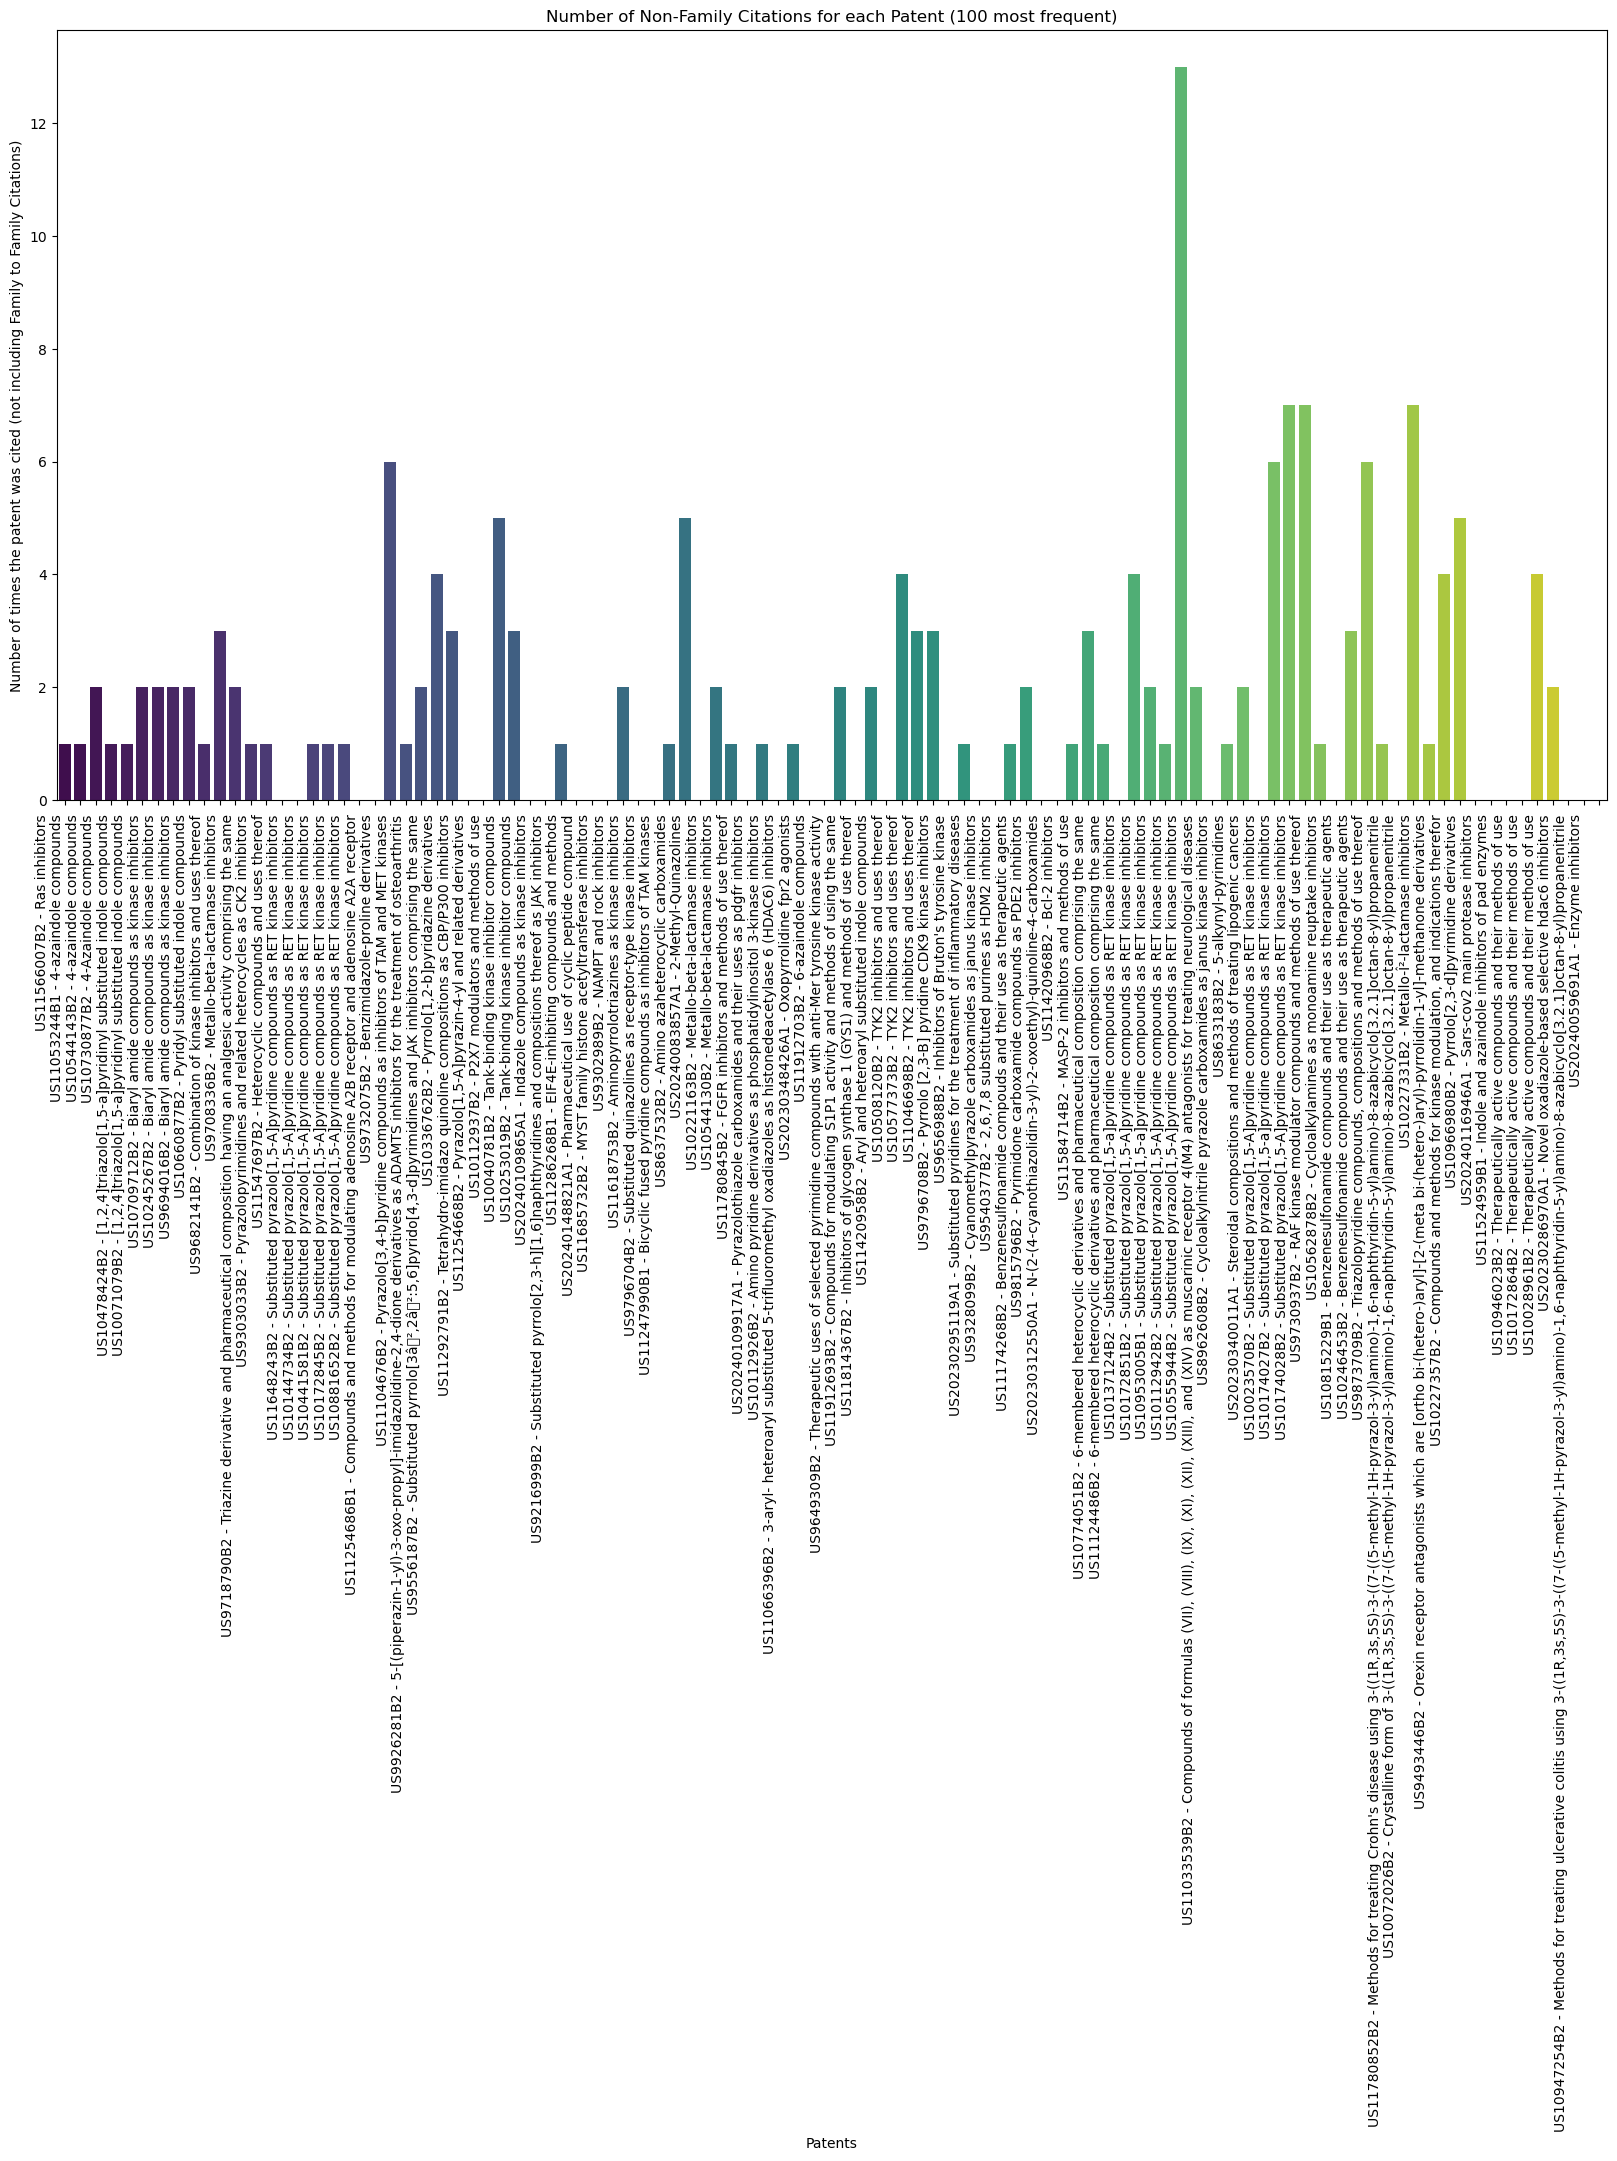

In [59]:
cleaned_patents = [patent for patent in patent_info if patent is not None]
cited_by = [
    int(patent["cited by"]) for patent in cleaned_patents if "cited by" in patent
]
patent_name = [
    patent["title"].replace(" - Google Patents", "")
    for patent in cleaned_patents
    if "title" in patent
]

data_citations = pd.DataFrame({"Patent": patent_name, "Cited By": cited_by})
plt.figure(figsize=(20, 10))
sns.barplot(x="Patent", y="Cited By", data=data_citations, palette="viridis")
plt.title("Number of Non-Family Citations for each Patent (100 most frequent)")
plt.xlabel("Patents")
plt.ylabel(
    "Number of times the patent was cited (not including Family to Family Citations)"
)
plt.xticks(rotation=90, ha="right")
plt.show()

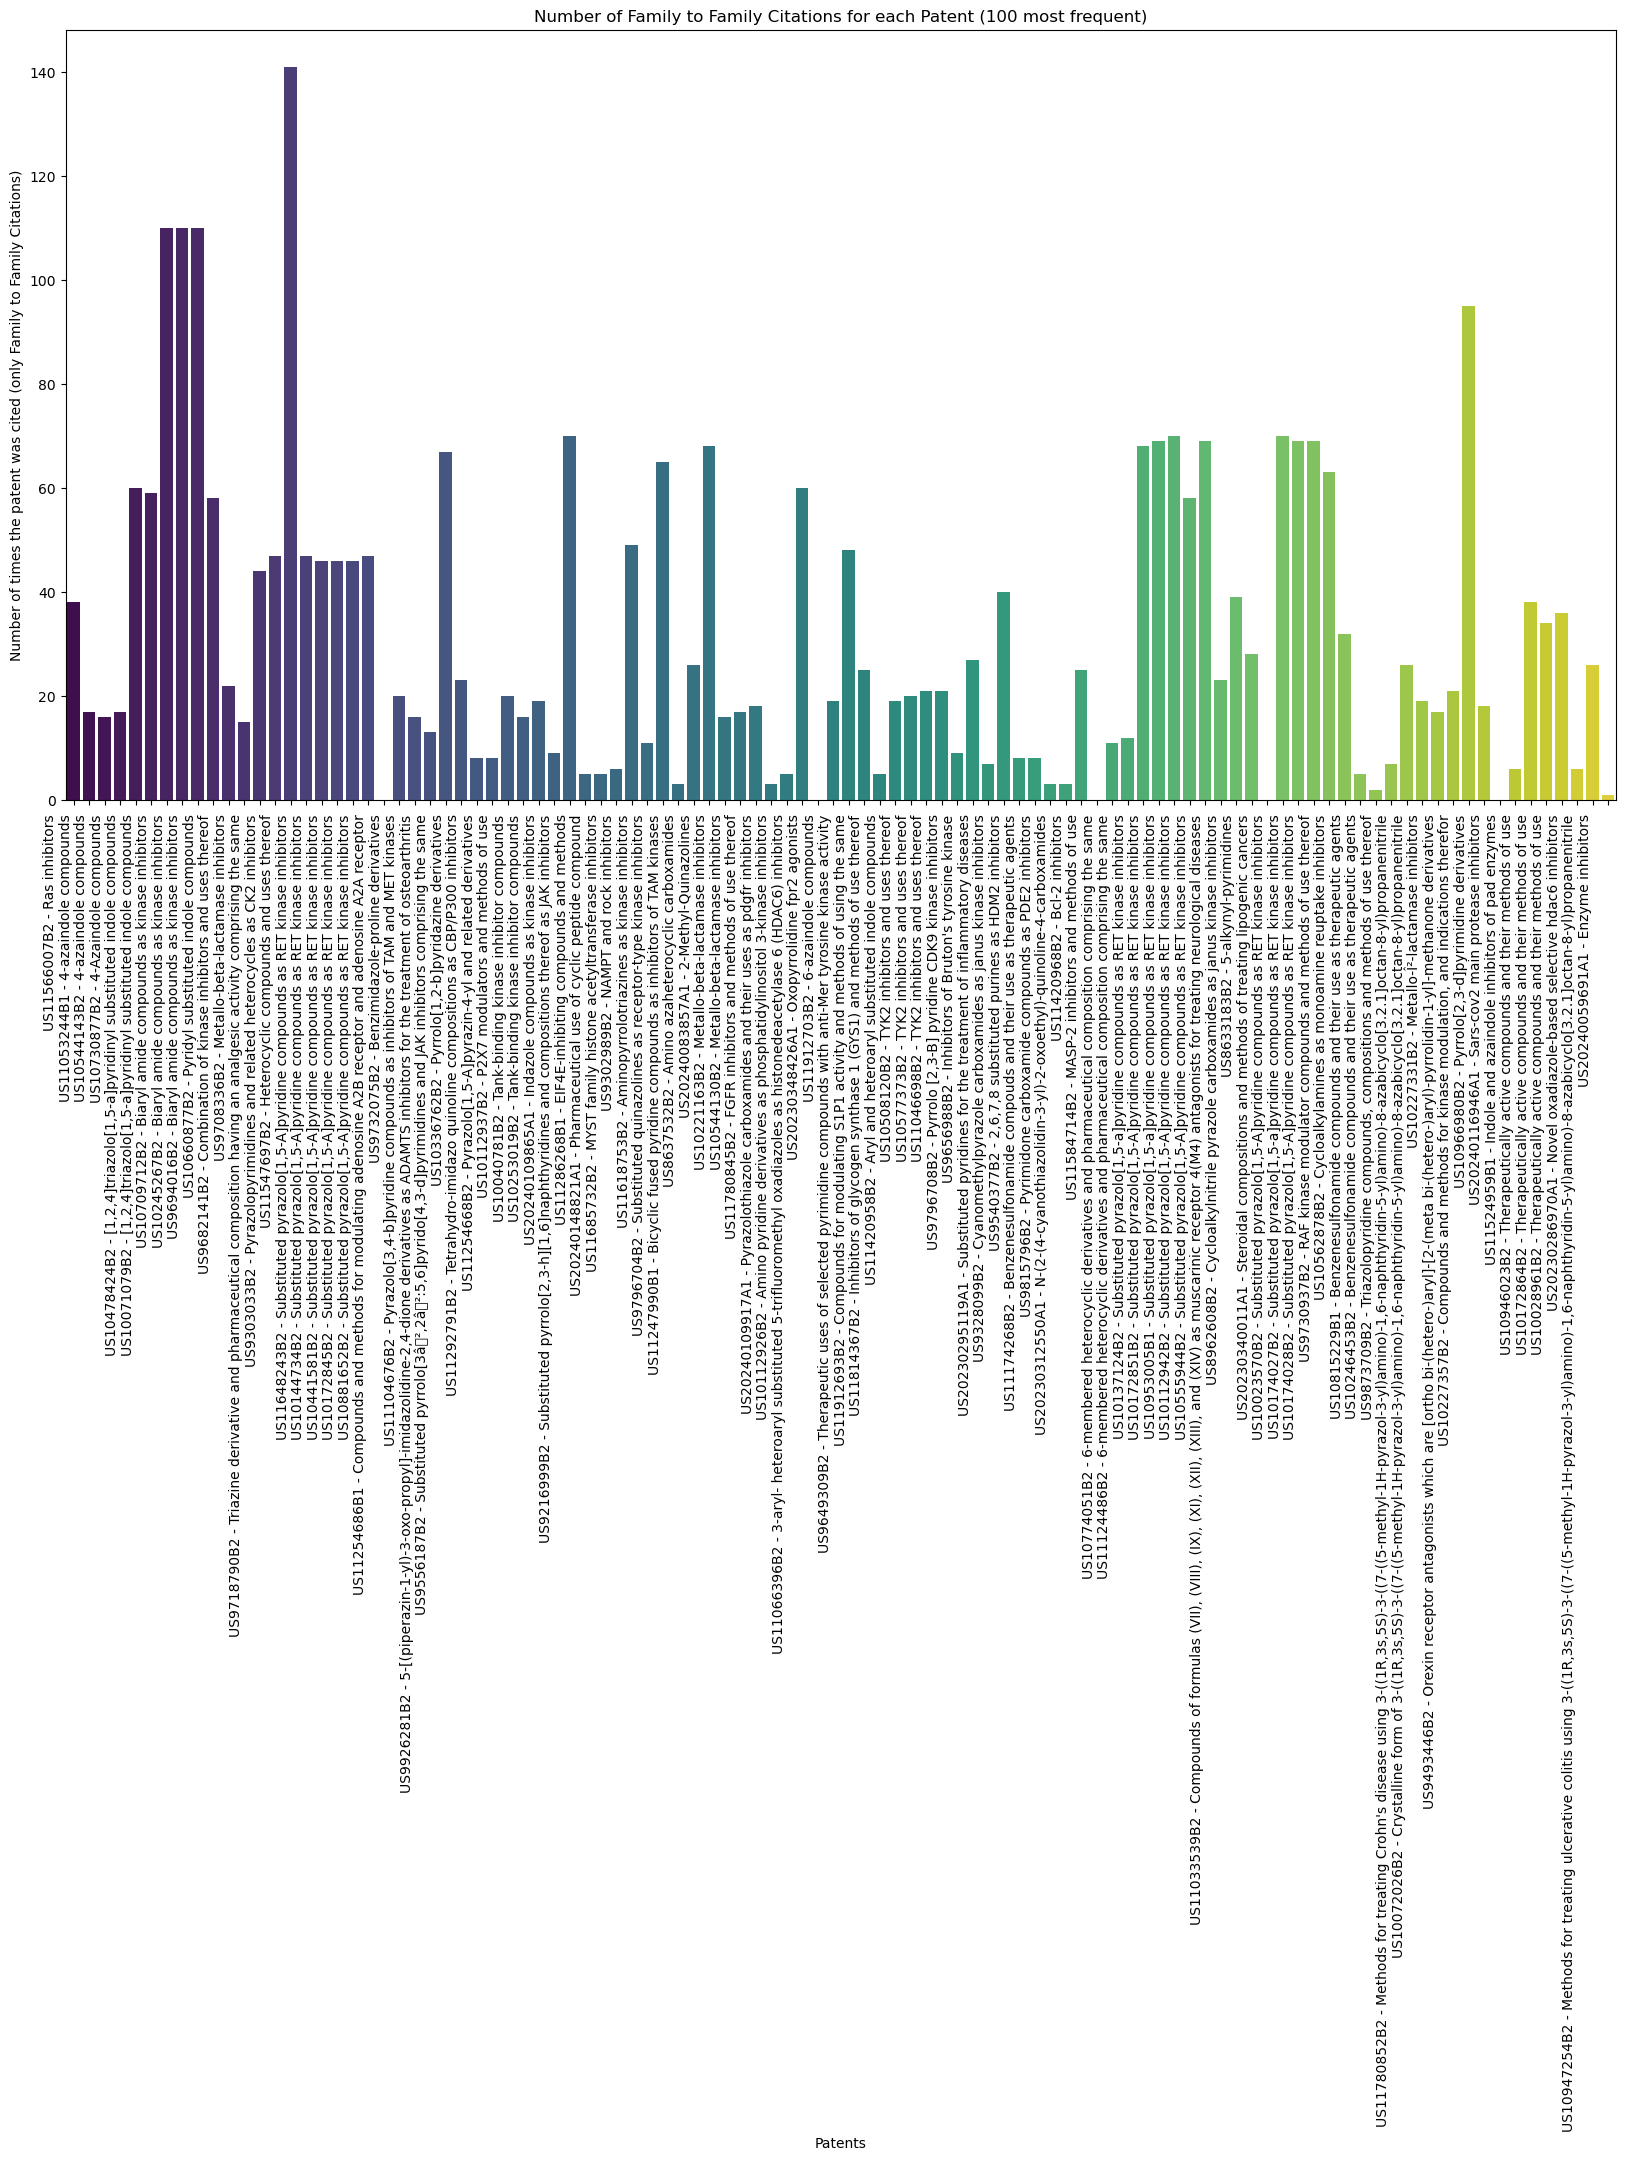

In [60]:
cited_by_family = [
    int(patent["families citing"])
    for patent in cleaned_patents
    if "families citing" in patent
]

data_family_citations = pd.DataFrame(
    {"Patent": patent_name, "Cited By (Family)": cited_by_family}
)
plt.figure(figsize=(20, 10))
sns.barplot(
    x="Patent", y="Cited By (Family)", data=data_family_citations, palette="viridis"
)
plt.title("Number of Family to Family Citations for each Patent (100 most frequent)")
plt.xlabel("Patents")
plt.ylabel("Number of times the patent was cited (only Family to Family Citations)")
plt.xticks(rotation=90, ha="right")
plt.show()